# Lead Scoring Case Study

**Problem Statement:**

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted.

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



## 1. Importing Dataset

In [1]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

In [3]:
# Load data from .csv file to dataframe

leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Copy of original dataset

leads_org = leads.copy()
leads_org

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


## 2. Data Understanding

In [5]:
# Shape of dataset

leads.shape

(9240, 37)

In [6]:
# Info of dataset

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
# Statistics summary of data

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 3. Data Cleaning

Few columns have "Select" as their values. If user doesn't select a value for a field then "Select" is the default value which is as good as null values. So, replace "Select" with np.NaN.

In [8]:
# Replace Select with NaN

leads.replace('Select', np.NaN, inplace=True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# Column wise null value count

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# row wise null value count

leads.isnull().sum(axis = 1)

0       5
1       5
2       1
3       1
4       2
       ..
9235    1
9236    1
9237    1
9238    5
9239    1
Length: 9240, dtype: int64

In [11]:
# Method to calculate column wise null value percentages

def null_percentages(df):
    print(round(100*df.isnull().sum()/df.shape[0], 2))

In [12]:
# Column wise null value percentages

null_percentages(leads)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

``How did you hear about X Education, Lead Quality`` and ``Lead Profile`` variables have high percentage of Null values.

Values for ``Tags, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score`` and ``Asymmetrique Profile Score`` were assigned by the Sales team after interacting with the lead.

So, we can go ahead and drop the above variables.

In [13]:
# drop variables

del_vars = ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Tags', 'Asymmetrique Activity Index', 
             'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

leads.drop(columns=del_vars, inplace=True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified


In [14]:
# value counts of 'DO not Email' variable

leads['Do Not Email'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [15]:
# value counts of 'DO not Call' variable

leads['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [16]:
# value counts of 'Country' variable

leads['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
Nigeria                 0.000590
Canada                  0.000590
Kuwait                  0.000590
South Africa            0.000590
Germany                 0.000590
Sweden                  0.000443
Netherlands             0.000295
Bangladesh              0.000295
Ghana                   0.000295
Philippines             0.000295
Italy                   0.000295
Uganda                  0.000295
Asia/Pacific Region     0.000295
Belgium                 0.000295
China                   0.000295
Denmark                 0.000148
Russia                  0.000148
Kenya     

In [17]:
# value counts of 'Search' variable

leads['Search'].value_counts(normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [18]:
# value counts of 'Newspaper Article' variable

leads['Newspaper Article'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

From above analysis on ``DO not Email, DO not Call, Country, Search`` and ``Newspaper Article`` variables, it seems like there are highly skewed variables in our dataset which might give biased results. So, lets go ahead and drop all such columns.

In [19]:
# Drop highly skewed variables

skewed_vars = ['Do Not Email', 'Do Not Call', 'Country', 'What is your current occupation', 'What matters most to you in choosing a course', 
        'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
         'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',
         'I agree to pay the amount through cheque']
leads.drop(columns=skewed_vars, inplace=True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,NaN,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,NaN,Mumbai,No,Modified


In [20]:
# Null value percentages of remaining columns

null_percentages(leads)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64


In [21]:
# dropping rows which have >= 5 null values

leads = leads[leads.isnull().sum(axis=1) < 5]

In [22]:
# Null value percentages of remaining records

null_percentages(leads)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.33
Converted                                  0.00
TotalVisits                                1.03
Total Time Spent on Website                0.00
Page Views Per Visit                       1.03
Last Activity                              0.71
Specialization                            36.29
City                                      39.43
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64


In [23]:
# Imputing missing values of Catgorical variables with Mode

cat_vars = ['Lead Source', 'Last Activity', 'Specialization', 'City']

for i in cat_vars:
    mo = leads[i].mode()[0]
    leads[i] = leads[i].fillna(mo)

In [24]:
# Statistics summary of 'TotalVisits' and 'Page Views Per Visit'

con_vars = ['TotalVisits', 'Page Views Per Visit']
leads[con_vars].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [25]:
# Imputing missing values of Continuous variables with Median

for j in con_vars:
    me = leads[j].median()
    leads[j] = leads[j].fillna(me)

In [26]:
# Null value percentages after imputation

null_percentages(leads)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64


In [27]:
# value counts of Lead Source after imputing with mode

leads['Lead Source'].value_counts(normalize=True)

Google               0.315068
Direct Traffic       0.276473
Olark Chat           0.190802
Organic Search       0.125462
Reference            0.055447
Welingak Website     0.014134
Referral Sites       0.013590
Facebook             0.005980
bing                 0.000652
google               0.000544
Click2call           0.000435
Live Chat            0.000217
Press_Release        0.000217
Social Media         0.000217
NC_EDM               0.000109
blog                 0.000109
youtubechannel       0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
testone              0.000109
WeLearn              0.000109
Name: Lead Source, dtype: float64

In [28]:
# value counts of Last Activity after imputing with mode

leads['Last Activity'].value_counts(normalize=True)

Email Opened                    0.380735
SMS Sent                        0.298434
Olark Chat Conversation         0.105784
Page Visited on Website         0.069580
Converted to Lead               0.046532
Email Bounced                   0.035008
Email Link Clicked              0.029028
Form Submitted on Website       0.012611
Unreachable                     0.010111
Unsubscribed                    0.006632
Had a Phone Conversation        0.003262
Approached upfront              0.000978
View in browser link Clicked    0.000652
Email Marked Spam               0.000217
Email Received                  0.000217
Resubscribed to emails          0.000109
Visited Booth in Tradeshow      0.000109
Name: Last Activity, dtype: float64

In [29]:
# value counts of Last Notable Activity after imputing with mode

leads['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.365840
Email Opened                    0.307349
SMS Sent                        0.236138
Page Visited on Website         0.034573
Olark Chat Conversation         0.019896
Email Link Clicked              0.018808
Email Bounced                   0.006523
Unsubscribed                    0.005110
Unreachable                     0.003479
Had a Phone Conversation        0.001522
Email Marked Spam               0.000217
Resubscribed to emails          0.000109
View in browser link Clicked    0.000109
Approached upfront              0.000109
Form Submitted on Website       0.000109
Email Received                  0.000109
Name: Last Notable Activity, dtype: float64

From above analysis, there are many levels which have negligible amount of values. Lets bucket them into one category.

In [30]:
# Bucketing variables

leads['Lead Source'] = leads['Lead Source'].apply(lambda x : x if x in ['Google', 'Direct Traffic', 'Olark Chat', 
                                                                        'Organic Search', 'Reference'] else 'Other')

leads['Last Activity'] = leads['Last Activity'].apply(lambda x : x if x in ['Email Opened', 'SMS Sent', 'Olark Chat Conversation', 
                                                                            'Page Visited on Website'] else 'Other')

leads['Last Notable Activity'] = leads['Last Notable Activity'].apply(lambda x : x if x in ['Modified', 'Email Opened', 
                                                                                            'SMS Sent'] else 'Other')

In [31]:
# Renaming columns which have lengthy names

leads.columns = ['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits', 'Total Time Spent', 
                 'Page Views Per Visit', 'Last Activity', 'Specialization', 'City', 'Interview copy', 'Last Notable Activity']

In [32]:
# inspecting the dataset

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent,Page Views Per Visit,Last Activity,Specialization,City,Interview copy,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Media and Advertising,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Other,Finance Management,Mumbai,No,Modified


In [33]:
# Retained rows pecentage

rr_percent = round(100*leads.shape[0]/leads_org.shape[0], 2)
print("After cleaning the dataset we have retained {} percent of original data.".format(rr_percent))

After cleaning the dataset we have retained 99.55 percent of original data.


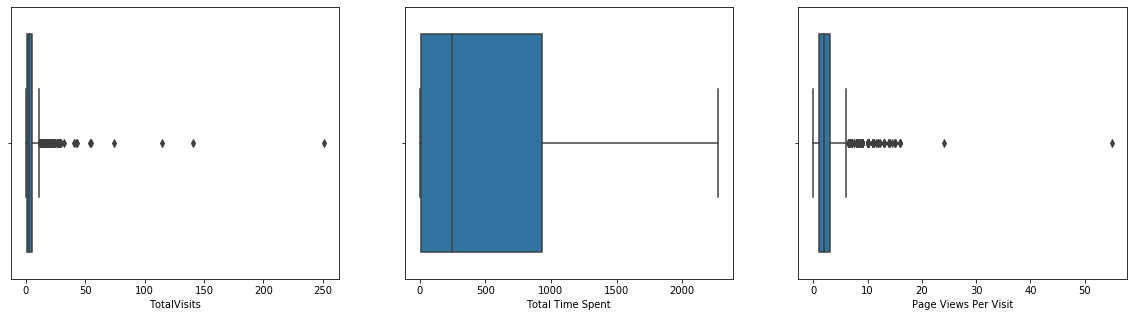

In [34]:
# Box plots of 'TotalVisits', 'Total Time Spent' and 'Page Views Per Visit'

cont_vars = ['TotalVisits', 'Total Time Spent', 'Page Views Per Visit']

plt.figure(figsize=(20,5))

for i in range(len(cont_vars)):
    
    plt.subplot(1,3,i+1)
    sns.boxplot(cont_vars[i], data=leads)

From above plots, it is clear that ``TotalVisits`` and ``Page Views Per Visit`` variables have some extreme values. It is imperative to treat them to make sure they are not affecting out analysis.

In [35]:
# Method to treat outliers using capping

def cap_outliers(col):
    UQ = leads[col].quantile(.95)
    leads[col][leads[col] > UQ] = UQ

In [36]:
# Capping the outliers

for i in cont_vars:
    cap_outliers(i)

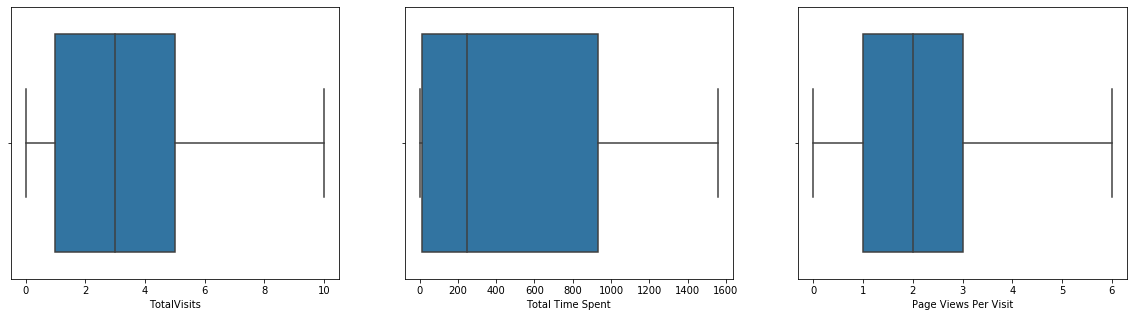

In [37]:
# Box plots after outlier handling

plt.figure(figsize=(20,5))

for i in range(len(cont_vars)):
    
    plt.subplot(1,3,i+1)
    sns.boxplot(cont_vars[i], data=leads)

After treating the extreme values, the columns are free from outliers.

## 4. Exploratory Data Analysis

We can ignore ``Prospect ID`` and ``Lead Number`` variables for further analysis as they are Unique ID's of leads and are not used in modelling.

In [38]:
# Ignoring 'Prospect ID' and 'Lead Number'

modelling_data = leads[leads.columns[2:]]
modelling_data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent,Page Views Per Visit,Last Activity,Specialization,City,Interview copy,Last Notable Activity
0,API,Olark Chat,0,0.0,0.0,0.0,Page Visited on Website,Finance Management,Mumbai,No,Modified
1,API,Organic Search,0,5.0,674.0,2.5,Email Opened,Finance Management,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532.0,2.0,Email Opened,Business Administration,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305.0,1.0,Other,Media and Advertising,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428.0,1.0,Other,Finance Management,Mumbai,No,Modified


In [39]:
# Splitting data to two data frames

conv = modelling_data[modelling_data['Converted'] == 1]
non_conv = modelling_data[modelling_data['Converted'] == 0]

In [40]:
# Method to plot Categorical variables using bar plot

def univariate_bar_plot(feature_name):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    conv[feature_name].value_counts().plot.bar()
    plt.title('{} for Converters'.format(feature_name))
    plt.subplot(1,2,2)
    non_conv[feature_name].value_counts().plot.bar()
    plt.title('{} for Non Converters'.format(feature_name))

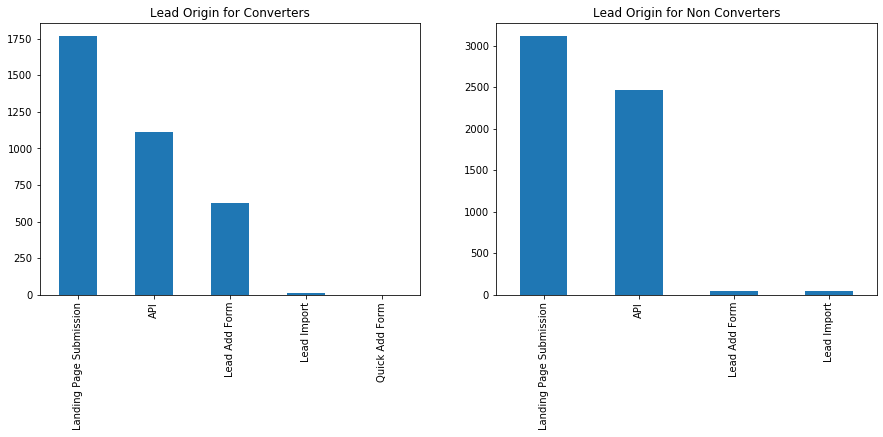

In [41]:
# Barplot of 'Lead Origin'

univariate_bar_plot('Lead Origin')

From above plot, origin is "Landing Page Submission" for most of the leads who have converted. The other take away is almost all the leads with origin "Lead Add Form" have converted and registered for online course. In addition to this, there is 100% coversion rate among the leads whose origin is "Quick Add Form".

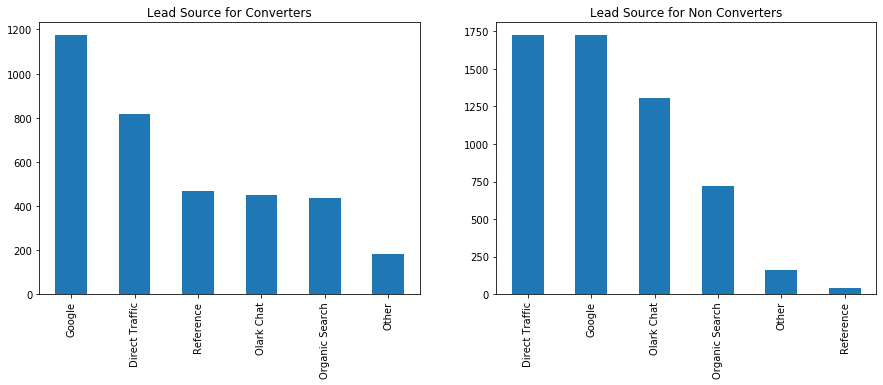

In [42]:
# Barplot of 'Lead Source'

univariate_bar_plot('Lead Source')

From above plot, Source is "Google" for most of the leads who have converted. The other take away is, almost all the leads with Source "Reference" have converted and registered for online course.

In [43]:
# Method to plot Categorical variables using Count plot

def univariate_count_plot(feature_name):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.countplot(conv[feature_name])
    plt.title('{} for Converters'.format(feature_name))
    plt.subplot(1,2,2)
    sns.countplot(non_conv[feature_name])
    plt.title('{} for Non Converters'.format(feature_name))

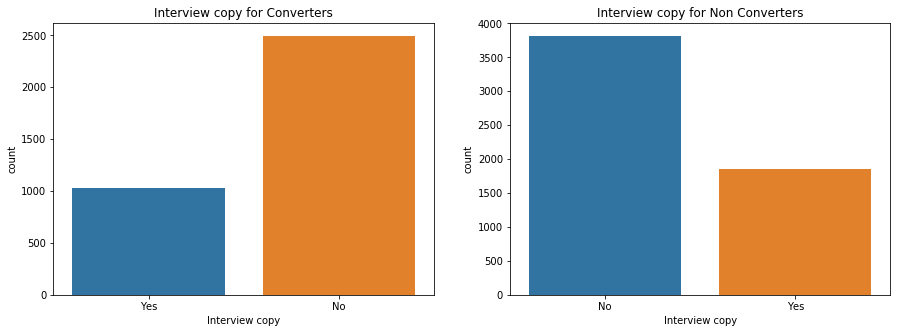

In [44]:
# Count plot of 'Interview copy'

univariate_count_plot('Interview copy')

From above plot, only 1/3 rd of the leads who are converted have opted to get "Mastering the interview" copy.

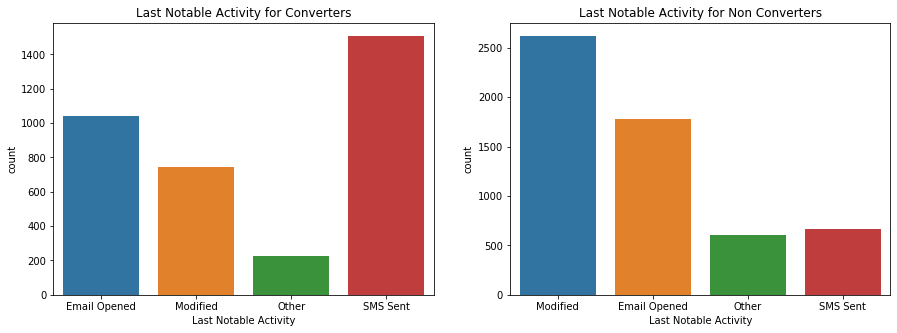

In [45]:
# Count plot of 'Last Notable Activity'

univariate_count_plot('Last Notable Activity')

From above plot, it is clear that "SMS Sent" is the most significant last notable activity for leads who have converted and the same "SMS Sent" is least significant activity among the leads who have not converted.

In [46]:
# Method to plot Continuous variables using box plot

def univariate_box_plot(feature_name):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(conv[feature_name])
    plt.title('{} for Converters'.format(feature_name))
    plt.subplot(1,2,2)
    sns.boxplot(non_conv[feature_name])
    plt.title('{} for Non Converters'.format(feature_name))

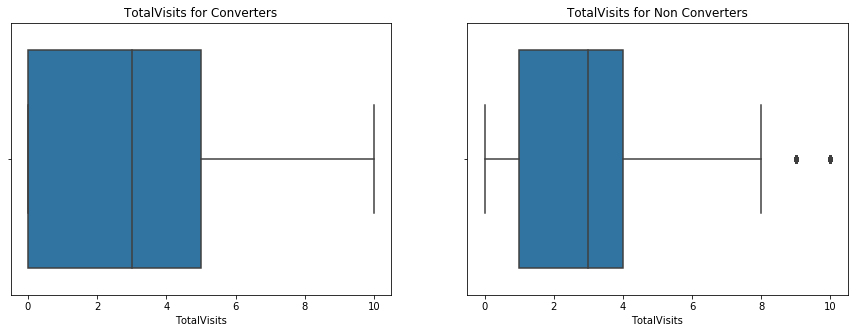

In [47]:
# Box plot of 'TotalVisits'

univariate_box_plot('TotalVisits')

From above plot, the distribution below median is much broder than the distribution above the median and box plot of Non Converters says that there are couple of outliers but they are not extreme values ard are pretty close to upper whisker. So, we can ignore them.

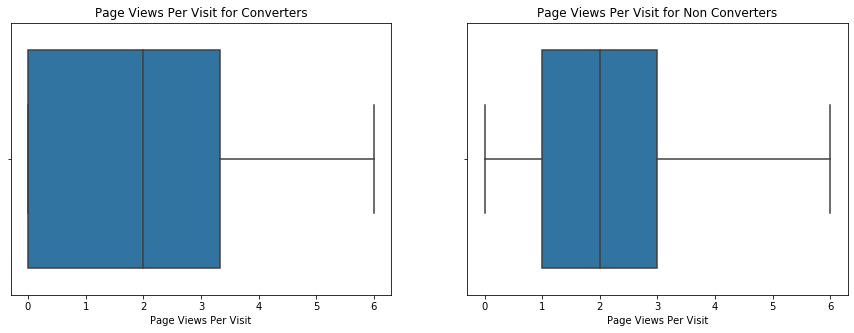

In [48]:
# Box plot of 'Page Views Per Visit'

univariate_box_plot('Page Views Per Visit')

From above plot of Converters, the boxplot is similar to "TotalVisits" plot where the distribution below median went all the way up to lower whisker.

In [49]:
# Method to plot Continuous variables using dist plot

def univariate_dist_plot(feature_name):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(conv[feature_name].dropna())
    plt.title('{} for Converters'.format(feature_name))
    plt.subplot(1,2,2)
    sns.distplot(non_conv[feature_name].dropna())
    plt.title('{} for Non Converters'.format(feature_name))

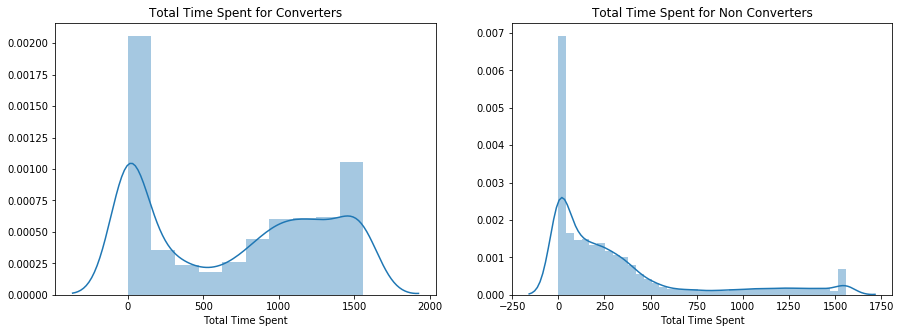

In [50]:
# dist plot of 'Total Time Spent'

univariate_dist_plot('Total Time Spent')

From above plot, the distribution for Non Converters is close to normal distribution.

In [51]:
# Method to plot Categorical-Numerical variables using bar plot

def bivariate_bar_plot(feature_name1, feature_name2):
    conv.groupby(feature_name1)[feature_name2].aggregate(['mean', 'median']).plot.bar()
    plt.ylabel('Mean and Median')
    plt.title('Converters')
    non_conv.groupby(feature_name1)[feature_name2].aggregate(['mean', 'median']).plot.bar()
    plt.ylabel('Mean and Median')
    plt.title('Non Converters')

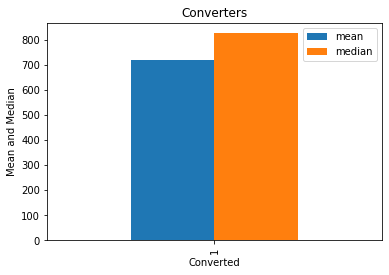

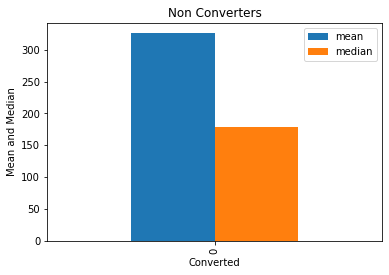

In [52]:
# plot of Mean and Median of 'Total Time Spent' for Converters and Non Converters using 'Converted'.

bivariate_bar_plot('Converted', 'Total Time Spent')

From above plot, there is significant different between the mean and median of Non converters. This is due to long tail on the right side in the distribution of "Total Time Spent" for Non Converters.

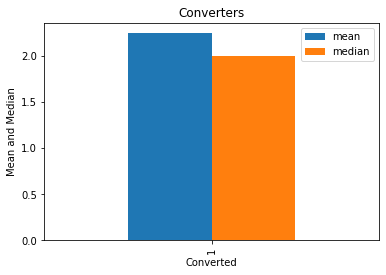

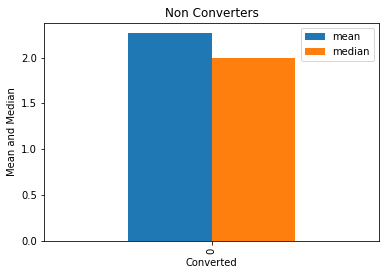

In [53]:
# plot of Mean and Median of 'Page Views Per Visit' for Converters and Non Converters using 'Converted'.

bivariate_bar_plot('Converted', 'Page Views Per Visit')

From above plot, the mean and medians of Converters and Non Converters are almost similar.

In [54]:
# Method to plot Categorical-Categorical variables using bar plot

def bivariate_cat_bar_plot(feature_name):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.xlim(0,1)
    ((conv[feature_name].value_counts(normalize=True))*100).plot.bar()
    plt.xlabel(feature_name)
    plt.ylabel('Target %')
    plt.title('Converters')
    plt.subplot(1,2,2)
    plt.xlabel(feature_name)
    plt.ylabel('Target %')
    ((non_conv[feature_name].value_counts(normalize=True))*100).plot.bar()
    plt.title('Non Converters')  

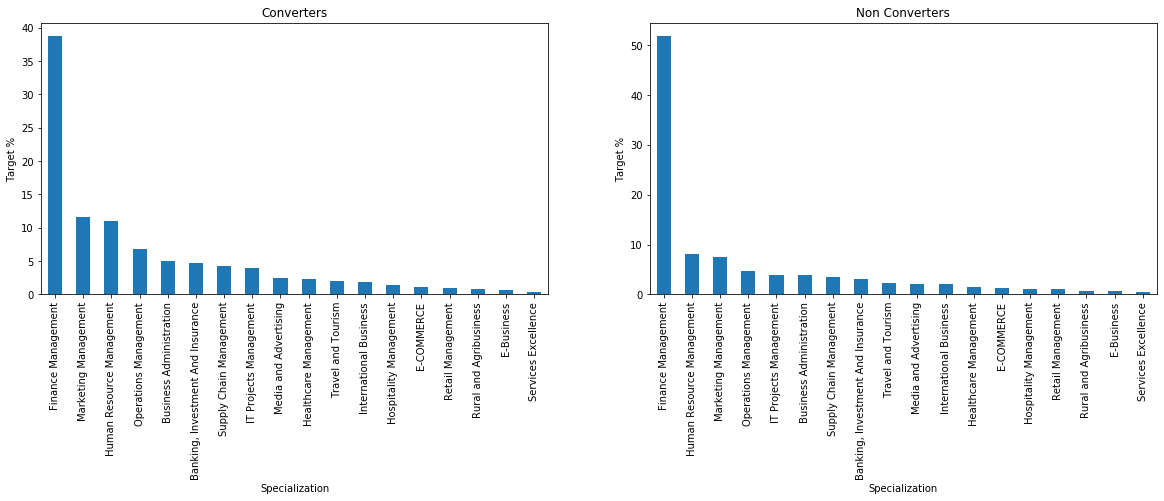

In [55]:
# Method to plot 'Specialization' variables using target variable

bivariate_cat_bar_plot('Specialization')

From above plot, there are high percentage of leads with "Finance Management" specialization which is almost triple than second best who have converted and registered for course.

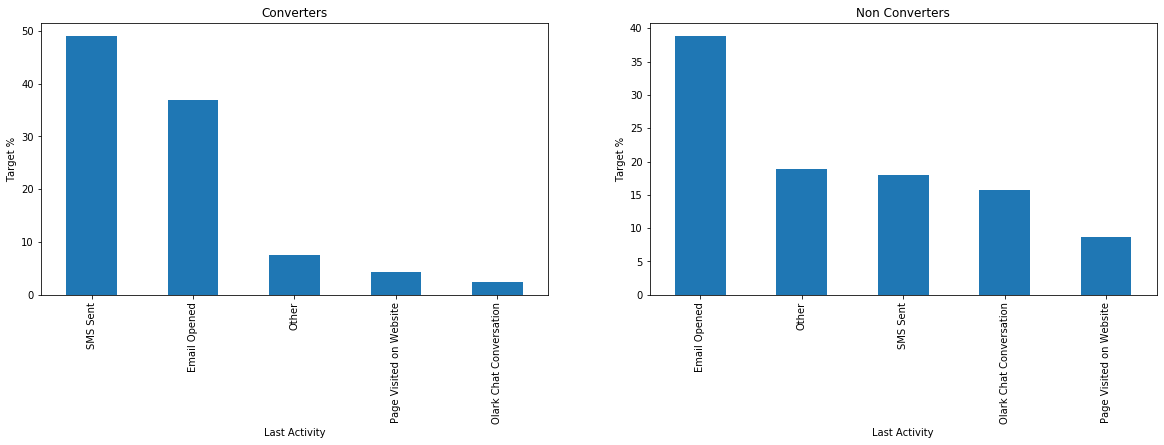

In [56]:
# Method to plot 'Last Activity' variables using target variable

bivariate_cat_bar_plot('Last Activity')

From above plot, "SMS Sent" and "Email Opened" are the 2 most significant last activies among the converted leads where "SMS Sent" among Converted is almost triple then non converters.

## 5. Data Preparation

In [57]:
# mapping Yes and No in 'Interview copy' to 1 and 0

modelling_data['Interview copy'].replace(['No', 'Yes'], [0,1], inplace=True)
modelling_data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent,Page Views Per Visit,Last Activity,Specialization,City,Interview copy,Last Notable Activity
0,API,Olark Chat,0,0.0,0.0,0.0,Page Visited on Website,Finance Management,Mumbai,0,Modified
1,API,Organic Search,0,5.0,674.0,2.5,Email Opened,Finance Management,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532.0,2.0,Email Opened,Business Administration,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305.0,1.0,Other,Media and Advertising,Mumbai,0,Modified
4,Landing Page Submission,Google,1,2.0,1428.0,1.0,Other,Finance Management,Mumbai,0,Modified


In [58]:
# Method to create dummies, concat them to original data frame and drop original column

def create_dummies(var1, var2):
    df = modelling_data
    dummies = pd.get_dummies(df[var1], prefix=var1)
    dummies.drop(columns=[var1+'_'+var2], inplace=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(columns=var1, inplace=True)
    return df

In [59]:
# Create dummies and concat dummies to dataframe

modelling_data = create_dummies('Lead Origin', 'Quick Add Form')
modelling_data = create_dummies('Lead Source', 'Other')
modelling_data = create_dummies('Last Activity', 'Other')
modelling_data = create_dummies('Specialization', 'Services Excellence')
modelling_data = create_dummies('City', 'Tier II Cities')
modelling_data = create_dummies('Last Notable Activity', 'Other')

In [60]:
# Inspect data frame

modelling_data.head()

,Converted,TotalVisits,Total Time Spent,Page Views Per Visit,Interview copy,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0,0.0,0.0,0.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,5.0,674.0,2.5,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,2.0,1532.0,2.0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,0,1.0,305.0,1.0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,1,2.0,1428.0,1.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [61]:
# Splitting data into train and test datasets

md_train, md_test = train_test_split(modelling_data, train_size=0.7, test_size=0.3, random_state=100)

In [62]:
# Scaling continuous variables

scaler = StandardScaler()
md_train[cont_vars]=scaler.fit_transform(md_train[cont_vars])
md_train

,Converted,TotalVisits,Total Time Spent,Page Views Per Visit,Interview copy,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
510,0,-0.427465,-0.766683,-0.705787,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3565,0,0.297132,1.218169,0.995562,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5685,1,1.021728,0.045818,2.129795,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1847,0,0.659430,-0.471228,1.562678,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1768,0,-1.152061,-0.908729,-1.272903,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,1,0.659430,1.394305,0.144888,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
80,0,-0.427465,-0.164410,-0.138670,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8079,1,-1.152061,-0.908729,-1.272903,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
6972,0,-0.427465,-0.554562,-0.138670,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [63]:
# Create X and y

y_train = md_train.pop('Converted')
X_train = md_train

In [64]:
# Inspecting y_train

y_train

510     0
3565    0
5685    1
1847    0
1768    0
       ..
356     1
80      0
8079    1
6972    0
5669    0
Name: Converted, Length: 6438, dtype: int64

In [65]:
# Inspecting X_train

X_train

,TotalVisits,Total Time Spent,Page Views Per Visit,Interview copy,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
510,-0.427465,-0.766683,-0.705787,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3565,0.297132,1.218169,0.995562,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
5685,1.021728,0.045818,2.129795,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1847,0.659430,-0.471228,1.562678,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1768,-1.152061,-0.908729,-1.272903,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0.659430,1.394305,0.144888,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
80,-0.427465,-0.164410,-0.138670,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
8079,-1.152061,-0.908729,-1.272903,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6972,-0.427465,-0.554562,-0.138670,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


## 6. Building a Model

In [66]:
# Building a model with all variables

lOg_re = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial()).fit()
lOg_re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6438
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2786.3
Date:                Mon, 01 Jun 2020   Deviance:                       5572.6
Time:                        13:18:22   Pearson chi2:                 6.87e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               17.4767   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
TotalVisits                                          0.3221      0.054      5.964      0.000       0.216       0.428
Total Time Spent                                     1.1213      0.039     28.830      0.000       1.045       1.198
Page Views Per Visit                                -0.2825      0.059     -4.804      0.000      -0.398      -0.167
Interview copy                                      -0.0427      0.104     -0.412      0.680      -0.246       0.160
Lead Origin_API                                    -19.8808   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission                -20.3064   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form                          -14.5297   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Import                            -19.7327   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Direct Traffic                          -0.0366      0.304     -0.120      0.904      -0.632       0.559
Lead Source_Google                                   0.3127      0.294      1.064      0.287      -0.263       0.889
Lead Source_Olark Chat                               1.2424      0.313      3.973      0.000       0.629       1.855
Lead Source_Organic Search                           0.1073      0.303      0.355      0.723      -0.486       0.700
Lead Source_Reference                               -1.2122      0.630     -1.924      0.054      -2.447       0.022
Last Activity_Email Opened                           0.8023      0.169      4.751      0.000       0.471       1.133
Last Activity_Olark Chat Conversation               -0.7433      0.190     -3.920      0.000      -1.115      -0.372
Last Activity_Page Visited on Website                0.0647      0.175      0.369      0.712      -0.278       0.408
Last Activity_SMS Sent                               1.0173      0.172      5.925      0.000       0.681       1.354
Specialization_Banking, Investment And Insurance     1.2228      0.669      1.828      0.068      -0.088       2.534
Specialization_Business Administration               0.9991      0.664      1.506      0.132      -0.301       2.300
Specialization_E-Business                            0.7776      0.779      0.998      0.318      -0.749       2.304
Specialization_E-COMMERCE                            1.0471      0.708      1.478      0.139      -0.341       2.435
Specialization_Finance Management                    0.5599      0.650      0.861      0.389      -0.715       1.835
Specialization_Healthcare Management     

In [67]:
# Running RFE with the number of the variable equal to 15

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Building model using statsmodel for detailed summary of statistics
#### Model 1: Build model with all 15 variables
        ['Total Time Spent', 'Lead Origin_API', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
        'Lead Origin_Lead Import', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Last Activity_Email Opened',
        'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Specialization_Finance Management',
        'Specialization_Hospitality Management', 'Specialization_Retail Management', 'Last Notable Activity_Modified',
        'Last Notable Activity_SMS Sent']

In [68]:
# Method to add constant variable and run the model

def run_statsmodel(df):
    X_train_rfe = sm.add_constant(df)
    lm = sm.GLM(y_train,X_train_rfe, family=sm.families.Binomial()).fit()
    return lm.summary(), lm

In [69]:
# Run the model on train dataset

col_1 = col
mod_1, lm_1 = run_statsmodel(X_train[col])
mod_1

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6438
Model:                            GLM   Df Residuals:                     6422
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2827.6
Date:                Mon, 01 Jun 2020   Deviance:                       5655.1
Time:                        13:18:24   Pearson chi2:                 6.70e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    18.7680   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Total Time Spent                          1.1344      0.038     29.532      0.000       1.059       1.210
Lead Origin_API                         -19.7507   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission     -20.3053   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form               -14.6120   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Import                 -19.6660   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Olark Chat                    1.0010      0.117      8.587      0.000       0.773       1.229
Lead Source_Reference                    -1.2091      0.629     -1.923      0.054      -2.441       0.023
Last Activity_Email Opened                0.5335      0.104      5.140      0.000       0.330       0.737
Last Activity_Olark Chat Conversation    -0.7774      0.177     -4.399      0.000      -1.124      -0.431
Last Activity_SMS Sent                    0.8965      0.155      5.795      0.000       0.593       1.200
Specialization_Finance Management        -0.5547      0.087     -6.405      0.000      -0.724      -0.385
Specialization_Hospitality Management    -0.8538      0.319     -2.679      0.007      -1.479      -0.229
Specialization_Retail Management         -0.4918      0.314     -1.565      0.118      -1.108       0.124
Last Notable Activity_Modified           -0.5187      0.100     -5.186      0.000      -0.715      -0.323
Last Notable Activity_SMS Sent            0.9683      0.173      5.591      0.000       0.629       1.308
=========================================================================================================
"""

In [70]:
# Method to calculate accuracy and Confusion metrix

def calculate_accuracy(lm, var_list):
    y_train_pred = lm.predict(sm.add_constant(X_train[var_list])).values.reshape(-1)
    df = pd.DataFrame()
    df['Lead Number'] = leads['Lead Number'][md_train.index]
    df['Converted'] = y_train.values
    df['Conv_Prob'] = y_train_pred
    df['Predicted'] = df['Conv_Prob'].apply(lambda x : 1 if x > 0.5 else 0)
    cm = metrics.confusion_matrix(df['Converted'], df['Predicted'])
    accuracy = metrics.accuracy_score(df['Converted'], df['Predicted'])
    return df, cm, round(accuracy, 3)

In [71]:
# Confusion metrix and accuracy

y_train_pred_final_1, cm_1, accuracy_1 = calculate_accuracy(lm_1, col_1)
print('Accuracy from Model 1 is {}'.format(accuracy_1))
cm_1

Accuracy from Model 1 is 0.802


array([[3476,  501],
       [ 775, 1686]], dtype=int64)

In [72]:
# Method to calculate the VIFs for the new model

def calculate_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [round(variance_inflation_factor(df.values, i),2) for i in range(df.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [73]:
# calculate the VIFs for the new model

VIF_1 = calculate_VIF(X_train[col])
VIF_1

,Features,VIF
14,Last Notable Activity_SMS Sent,6.68
1,Lead Origin_API,6.63
9,Last Activity_SMS Sent,6.42
3,Lead Origin_Lead Add Form,5.18
2,Lead Origin_Landing Page Submission,4.93
6,Lead Source_Reference,4.21
7,Last Activity_Email Opened,3.55
10,Specialization_Finance Management,3.26
13,Last Notable Activity_Modified,3.02
5,Lead Source_Olark Chat,2.33


From Model 1, **accuracy is 0.802**. We also have significant number of variables whose VIF and p-values are greater then accepteble limits.


Lets drop ``Last Notable Activity_SMS Sent`` variable which has pretty high VIF and build a model with remaining 14 variables.

#### Model 2: Build a model with below 14 variables
        ['Total Time Spent', 'Lead Origin_API', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
        'Lead Origin_Lead Import', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Last Activity_Email Opened',
        'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Specialization_Finance Management',
        'Specialization_Hospitality Management', 'Specialization_Retail Management', 'Last Notable Activity_Modified']

In [74]:
# Run the model on train dataset

col_2 = ['Total Time Spent', 'Lead Origin_API', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
        'Lead Origin_Lead Import', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Last Activity_Email Opened',
        'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Specialization_Finance Management',
        'Specialization_Hospitality Management', 'Specialization_Retail Management', 'Last Notable Activity_Modified']
mod_2, lm_2 = run_statsmodel(X_train[col_2])
mod_2

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6438
Model:                            GLM   Df Residuals:                     6423
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2843.5
Date:                Mon, 01 Jun 2020   Deviance:                       5686.9
Time:                        13:18:25   Pearson chi2:                 6.69e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    19.0953   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Total Time Spent                          1.1361      0.038     29.629      0.000       1.061       1.211
Lead Origin_API                         -19.8877   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission     -20.4427   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form               -14.8349   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Import                 -19.8585   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Olark Chat                    1.0071      0.116      8.677      0.000       0.780       1.235
Lead Source_Reference                    -1.1085      0.628     -1.766      0.077      -2.339       0.122
Last Activity_Email Opened                0.3931      0.100      3.912      0.000       0.196       0.590
Last Activity_Olark Chat Conversation    -0.7443      0.178     -4.189      0.000      -1.093      -0.396
Last Activity_SMS Sent                    1.5395      0.102     15.093      0.000       1.340       1.739
Specialization_Finance Management        -0.5519      0.086     -6.391      0.000      -0.721      -0.383
Specialization_Hospitality Management    -0.8690      0.318     -2.732      0.006      -1.493      -0.245
Specialization_Retail Management         -0.4927      0.312     -1.579      0.114      -1.104       0.119
Last Notable Activity_Modified           -0.8496      0.082    -10.368      0.000      -1.010      -0.689
=========================================================================================================
"""

In [75]:
# Confusion metrix and accuracy

y_train_pred_final_2, cm_2, accuracy_2 = calculate_accuracy(lm_2, col_2)
print('Accuracy from Model 2 is {}'.format(accuracy_2))
cm_2

Accuracy from Model 2 is 0.803


array([[3496,  481],
       [ 786, 1675]], dtype=int64)

In [76]:
# calculate the VIFs for the new model

VIF_2 = calculate_VIF(X_train[col_2])
VIF_2

,Features,VIF
1,Lead Origin_API,6.21
3,Lead Origin_Lead Add Form,5.10
2,Lead Origin_Landing Page Submission,4.38
6,Lead Source_Reference,4.21
7,Last Activity_Email Opened,3.33
10,Specialization_Finance Management,3.26
9,Last Activity_SMS Sent,2.85
5,Lead Source_Olark Chat,2.33
13,Last Notable Activity_Modified,2.14
8,Last Activity_Olark Chat Conversation,1.80


From Model 2, **accuracy is 0.803** which has increased slightly when compared to Model 1. We also have couple of variables whose VIF are greater than acceptable limits and there are significant number of variables whose p-value is greater than 0.05.

Lets drop ``Lead Origin_API`` variable which has pretty high VIF and build a model with remaining 13 variables.

#### Model 3: Build a model with below 13 variables
         ['Total Time Spent', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
        'Lead Origin_Lead Import', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Last Activity_Email Opened',
        'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Specialization_Finance Management',
        'Specialization_Hospitality Management', 'Specialization_Retail Management', 'Last Notable Activity_Modified']

In [77]:
# Run the model on train dataset

col_3 = ['Total Time Spent', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
    'Lead Origin_Lead Import', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Last Activity_Email Opened',
    'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Specialization_Finance Management',
    'Specialization_Hospitality Management', 'Specialization_Retail Management', 'Last Notable Activity_Modified']
mod_3, lm_3 = run_statsmodel(X_train[col_3])
mod_3

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6438
Model:                            GLM   Df Residuals:                     6424
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2843.9
Date:                Mon, 01 Jun 2020   Deviance:                       5687.8
Time:                        13:18:25   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7883      0.131     -6.014      0.000      -1.045      -0.531
Total Time Spent                          1.1368      0.038     29.653      0.000       1.062       1.212
Lead Origin_Landing Page Submission      -0.5579      0.099     -5.621      0.000      -0.752      -0.363
Lead Origin_Lead Add Form                 5.0524      0.596      8.478      0.000       3.884       6.220
Lead Origin_Lead Import                   0.0276      0.448      0.062      0.951      -0.851       0.906
Lead Source_Olark Chat                    1.0066      0.116      8.673      0.000       0.779       1.234
Lead Source_Reference                    -1.1097      0.628     -1.768      0.077      -2.340       0.120
Last Activity_Email Opened                0.3915      0.100      3.897      0.000       0.195       0.588
Last Activity_Olark Chat Conversation    -0.7465      0.178     -4.202      0.000      -1.095      -0.398
Last Activity_SMS Sent                    1.5380      0.102     15.084      0.000       1.338       1.738
Specialization_Finance Management        -0.5538      0.086     -6.415      0.000      -0.723      -0.385
Specialization_Hospitality Management    -0.8700      0.318     -2.734      0.006      -1.494      -0.246
Specialization_Retail Management         -0.4934      0.312     -1.582      0.114      -1.105       0.118
Last Notable Activity_Modified           -0.8487      0.082    -10.359      0.000      -1.009      -0.688
=========================================================================================================
"""

In [78]:
# Confusion metrix and accuracy

y_train_pred_final_3, cm_3, accuracy_3 = calculate_accuracy(lm_3, col_3)
print('Accuracy from Model 3 is {}'.format(accuracy_3))
cm_3

Accuracy from Model 3 is 0.803


array([[3496,  481],
       [ 785, 1676]], dtype=int64)

In [79]:
# calculate the VIFs for the new model

VIF_3 = calculate_VIF(X_train[col_3])
VIF_3

,Features,VIF
2,Lead Origin_Lead Add Form,4.51
5,Lead Source_Reference,4.19
1,Lead Origin_Landing Page Submission,2.56
9,Specialization_Finance Management,2.33
6,Last Activity_Email Opened,2.25
4,Lead Source_Olark Chat,2.10
8,Last Activity_SMS Sent,2.06
12,Last Notable Activity_Modified,1.78
7,Last Activity_Olark Chat Conversation,1.69
0,Total Time Spent,1.27


From Model 3, **accuracy is 0.803** and also all VIF's are under check. But there are some variables which have high p-values. 

Let's drop ``Lead Origin_Lead Import`` variable which has highest p-value and rebuild the model with remaining 12 variables.

#### Model 4: Build a model with below 12 variables
         ['Total Time Spent', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
          'Lead Source_Olark Chat', 'Lead Source_Reference', 'Last Activity_Email Opened',
          'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Specialization_Finance Management',
          'Specialization_Hospitality Management', 'Specialization_Retail Management', 'Last Notable Activity_Modified']

In [80]:
# Run the model on train dataset

col_4 = ['Total Time Spent', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
          'Lead Source_Olark Chat', 'Lead Source_Reference', 'Last Activity_Email Opened',
          'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Specialization_Finance Management',
          'Specialization_Hospitality Management', 'Specialization_Retail Management', 'Last Notable Activity_Modified']
mod_4, lm_4 = run_statsmodel(X_train[col_4])
mod_4 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6438
Model:                            GLM   Df Residuals:                     6425
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2843.9
Date:                Mon, 01 Jun 2020   Deviance:                       5687.8
Time:                        13:18:25   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7879      0.131     -6.020      0.000      -1.044      -0.531
Total Time Spent                          1.1367      0.038     29.685      0.000       1.062       1.212
Lead Origin_Landing Page Submission      -0.5586      0.099     -5.666      0.000      -0.752      -0.365
Lead Origin_Lead Add Form                 5.0515      0.596      8.479      0.000       3.884       6.219
Lead Source_Olark Chat                    1.0058      0.115      8.724      0.000       0.780       1.232
Lead Source_Reference                    -1.1098      0.628     -1.768      0.077      -2.340       0.120
Last Activity_Email Opened                0.3918      0.100      3.906      0.000       0.195       0.588
Last Activity_Olark Chat Conversation    -0.7467      0.178     -4.203      0.000      -1.095      -0.399
Last Activity_SMS Sent                    1.5382      0.102     15.095      0.000       1.339       1.738
Specialization_Finance Management        -0.5538      0.086     -6.415      0.000      -0.723      -0.385
Specialization_Hospitality Management    -0.8701      0.318     -2.735      0.006      -1.494      -0.246
Specialization_Retail Management         -0.4935      0.312     -1.582      0.114      -1.105       0.118
Last Notable Activity_Modified           -0.8483      0.082    -10.392      0.000      -1.008      -0.688
=========================================================================================================
"""

In [81]:
# Confusion metrix and accuracy

y_train_pred_final_4, cm_4, accuracy_4 = calculate_accuracy(lm_4, col_4)
print('Accuracy from Model 4 is {}'.format(accuracy_4))
cm_4

Accuracy from Model 4 is 0.804


array([[3496,  481],
       [ 784, 1677]], dtype=int64)

In [82]:
# calculate the VIFs for the new model

VIF_4 = calculate_VIF(X_train[col_4])
VIF_4

,Features,VIF
2,Lead Origin_Lead Add Form,4.50
4,Lead Source_Reference,4.19
1,Lead Origin_Landing Page Submission,2.52
8,Specialization_Finance Management,2.33
5,Last Activity_Email Opened,2.22
3,Lead Source_Olark Chat,2.07
7,Last Activity_SMS Sent,2.04
11,Last Notable Activity_Modified,1.76
6,Last Activity_Olark Chat Conversation,1.69
0,Total Time Spent,1.26


From Model 4, **accuracy is 0.804** which has increased slightly when compared to Model 3. Also, all VIF's are under check. But there are couple of variables which have high p-values. 

Let's drop ``Specialization_Retail Management`` variable which has highest p-value and rebuild the model with remaining 11 variables.

#### Model 5: Build a model with below 11 variables
         ['Total Time Spent', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
          'Lead Source_Olark Chat', 'Lead Source_Reference', 'Last Activity_Email Opened',
          'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Specialization_Finance Management',
          'Specialization_Hospitality Management', 'Last Notable Activity_Modified']

In [83]:
# Run the model on train dataset

col_5 = ['Total Time Spent', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
      'Lead Source_Olark Chat', 'Lead Source_Reference', 'Last Activity_Email Opened',
      'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Specialization_Finance Management',
      'Specialization_Hospitality Management', 'Last Notable Activity_Modified']
mod_5, lm_5 = run_statsmodel(X_train[col_5])
mod_5

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6438
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2845.2
Date:                Mon, 01 Jun 2020   Deviance:                       5690.4
Time:                        13:18:26   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7992      0.131     -6.114      0.000      -1.055      -0.543
Total Time Spent                          1.1369      0.038     29.702      0.000       1.062       1.212
Lead Origin_Landing Page Submission      -0.5605      0.099     -5.684      0.000      -0.754      -0.367
Lead Origin_Lead Add Form                 5.0524      0.596      8.481      0.000       3.885       6.220
Lead Source_Olark Chat                    1.0063      0.115      8.728      0.000       0.780       1.232
Lead Source_Reference                    -1.1056      0.628     -1.762      0.078      -2.336       0.124
Last Activity_Email Opened                0.3944      0.100      3.934      0.000       0.198       0.591
Last Activity_Olark Chat Conversation    -0.7434      0.178     -4.185      0.000      -1.092      -0.395
Last Activity_SMS Sent                    1.5398      0.102     15.115      0.000       1.340       1.740
Specialization_Finance Management        -0.5443      0.086     -6.318      0.000      -0.713      -0.375
Specialization_Hospitality Management    -0.8598      0.318     -2.702      0.007      -1.483      -0.236
Last Notable Activity_Modified           -0.8484      0.082    -10.395      0.000      -1.008      -0.688
=========================================================================================================
"""

In [84]:
# Confusion metrix and accuracy

y_train_pred_final_5, cm_5, accuracy_5 = calculate_accuracy(lm_5, col_5)
print('Accuracy using Model 5 is {}'.format(accuracy_5))
cm_5

Accuracy using Model 5 is 0.802


array([[3495,  482],
       [ 790, 1671]], dtype=int64)

In [85]:
# calculate the VIFs for the new model

VIF_5 = calculate_VIF(X_train[col_5])
VIF_5

,Features,VIF
2,Lead Origin_Lead Add Form,4.50
4,Lead Source_Reference,4.19
1,Lead Origin_Landing Page Submission,2.51
8,Specialization_Finance Management,2.32
5,Last Activity_Email Opened,2.22
3,Lead Source_Olark Chat,2.07
7,Last Activity_SMS Sent,2.04
10,Last Notable Activity_Modified,1.76
6,Last Activity_Olark Chat Conversation,1.69
0,Total Time Spent,1.26


From Model 5, **accuracy is 0.802** which has dipped by .002 which is negligible. Also, all VIF's are under check. But there is a variable which has high p-values. 

Let's drop ``Lead Source_Reference`` variable which has highest p-value and rebuild the model with remaining 10 variables.

#### Model 6: Build a model with below 10 variables
        ['Total Time Spent', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
        'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 
        'Specialization_Finance Management','Specialization_Hospitality Management', 'Last Notable Activity_Modified']

In [86]:
# Run the model on train dataset

col_6 = ['Total Time Spent', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
    'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 
    'Specialization_Finance Management','Specialization_Hospitality Management', 'Last Notable Activity_Modified']
mod_6, lm_6 = run_statsmodel(X_train[col_6])
mod_6

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6438
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2847.2
Date:                Mon, 01 Jun 2020   Deviance:                       5694.3
Time:                        13:18:26   Pearson chi2:                 6.68e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8068      0.131     -6.172      0.000      -1.063      -0.551
Total Time Spent                          1.1369      0.038     29.689      0.000       1.062       1.212
Lead Origin_Landing Page Submission      -0.5526      0.099     -5.609      0.000      -0.746      -0.360
Lead Origin_Lead Add Form                 4.1439      0.215     19.237      0.000       3.722       4.566
Lead Source_Olark Chat                    1.0045      0.115      8.716      0.000       0.779       1.230
Last Activity_Email Opened                0.3916      0.100      3.906      0.000       0.195       0.588
Last Activity_Olark Chat Conversation    -0.7404      0.177     -4.172      0.000      -1.088      -0.393
Last Activity_SMS Sent                    1.5407      0.102     15.127      0.000       1.341       1.740
Specialization_Finance Management        -0.5307      0.086     -6.175      0.000      -0.699      -0.362
Specialization_Hospitality Management    -0.8677      0.320     -2.715      0.007      -1.494      -0.241
Last Notable Activity_Modified           -0.8553      0.082    -10.486      0.000      -1.015      -0.695
=========================================================================================================
"""

In [87]:
# Confusion metrix and accuracy

y_train_pred_final_6, cm_6, accuracy_6 = calculate_accuracy(lm_6, col_6)
print('Accuracy using Model 6 is {}'.format(accuracy_6))
cm_6

Accuracy using Model 6 is 0.802


array([[3493,  484],
       [ 789, 1672]], dtype=int64)

In [88]:
# calculate the VIFs for the new model

VIF_6 = calculate_VIF(X_train[col_6])
VIF_6

,Features,VIF
1,Lead Origin_Landing Page Submission,2.51
7,Specialization_Finance Management,2.28
4,Last Activity_Email Opened,2.21
3,Lead Source_Olark Chat,2.07
6,Last Activity_SMS Sent,2.04
9,Last Notable Activity_Modified,1.75
5,Last Activity_Olark Chat Conversation,1.69
2,Lead Origin_Lead Add Form,1.32
0,Total Time Spent,1.26
8,Specialization_Hospitality Management,1.02


Now as we can see, the VIFs and p-values are within the acceptable range. Using this model we have to make the predictions on test data to validate the model.

**Accuracy of our final model is 0.802**

## 7. Model Evaluation

In [89]:
# Let us calculate sensitivity

TP = cm_6[1,1] # True Positive
TN = cm_6[0,0] # True Negative
FP = cm_6[0,1] # False Positive
FN = cm_6[1,0] # False Negative

sensitivity_score = TP / float(TP+FN)
sensitivity_score

0.6793986184477855

In [90]:
# Let us calculate specificity

specificity_score = TN / float(TN+FP)
specificity_score

0.8783002263012321

In [91]:
# positive predictive rate

ppr = TP / float(TP+FP)
ppr

0.7755102040816326

In [92]:
# precision value

pv = metrics.precision_score(y_train_pred_final_6['Converted'], y_train_pred_final_6['Predicted'])
pv

0.7755102040816326

Positive predictive rate is also called as **Precision**.

In [93]:
# recall value

rv = metrics.recall_score(y_train_pred_final_6['Converted'], y_train_pred_final_6['Predicted'])
rv

0.6793986184477855

Recall value is also called as **Sensitivity**.

Our model accuracy is 0.802 but sensitivity/Recall is 0.68. Even though accuracy is high, our model is below par in predicting actual converted as converted.

## 8. ROC Curve

In [94]:
# Method to draw ROC curver

def roc_curve(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc = metrics.roc_auc_score(actual, probs)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.legend(loc="lower right")
    plt.plot([0,1], [0,1])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')

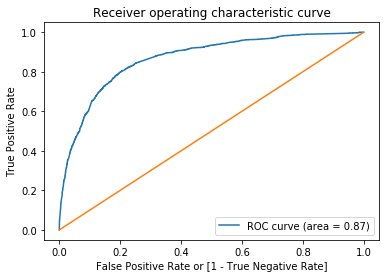

In [95]:
# Plotting ROC curve

roc_curve(y_train_pred_final_6['Converted'], y_train_pred_final_6['Conv_Prob'])

We have good amount of area under the curve. So, our model is not a random model.

## 9. Finding Optimal Cutoff Point

In [96]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_6[i]= y_train_pred_final_6['Conv_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final_6.head()

,Lead Number,Converted,Conv_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
510,655079,0,0.139735,0,1,1,0,0,0,0,0,0,0,0
3565,626334,0,0.602810,1,1,1,1,1,1,1,1,0,0,0
5685,606404,1,0.686964,1,1,1,1,1,1,1,1,0,0,0
1847,641584,0,0.115659,0,1,1,0,0,0,0,0,0,0,0
1768,642182,0,0.049179,0,1,0,0,0,0,0,0,0,0,0


In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final_6['Converted'], y_train_pred_final_6[i])
    accuracy = metrics.accuracy_score(y_train_pred_final_6['Converted'], y_train_pred_final_6[i])
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[int(i*10)] =[i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0,0.0,0.382262,1.000000,0.000000
1,0.1,0.575334,0.966274,0.333417
2,0.2,0.710314,0.911418,0.585869
3,0.3,0.785958,0.839902,0.752577
4,0.4,0.801491,0.746038,0.835806
5,0.5,0.802268,0.679399,0.878300
6,0.6,0.786114,0.573751,0.917526
7,0.7,0.763747,0.473385,0.943425
8,0.8,0.736875,0.360423,0.969827
9,0.9,0.691985,0.214141,0.987679


Text(0.5, 1.0, 'Sesitivity Specificity tradeoff')

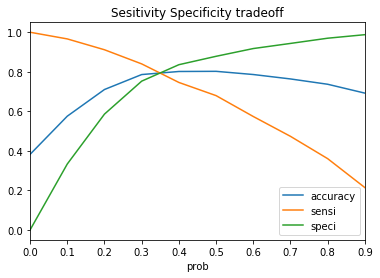

In [98]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title("Sesitivity Specificity tradeoff")

**From above curve, we can say that optimal cutoff prob is at around 0.35 where we are getting 0.8 or 80% as sensitivity.**

Text(0.5, 1.0, 'Precision Recall tradeoff')

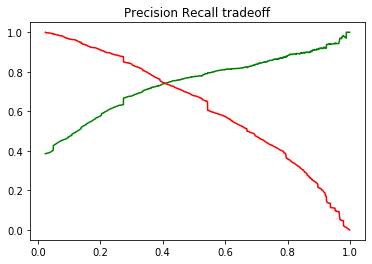

In [99]:
# Precision recall tradeoff

p, r, thresholds = metrics.precision_recall_curve(y_train_pred_final_6['Converted'], y_train_pred_final_6['Conv_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision Recall tradeoff")

**From above curve, we can say that optimal cutoff prob is at around 0.4.**

In [100]:
# Final prediction using 0.35 as cutoff probability

y_train_pred_final_6['final_predicted'] = y_train_pred_final_6.Conv_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final_6.head()

,Lead Number,Converted,Conv_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
510,655079,0,0.139735,0,1,1,0,0,0,0,0,0,0,0,0
3565,626334,0,0.602810,1,1,1,1,1,1,1,1,0,0,0,1
5685,606404,1,0.686964,1,1,1,1,1,1,1,1,0,0,0,1
1847,641584,0,0.115659,0,1,1,0,0,0,0,0,0,0,0,0
1768,642182,0,0.049179,0,1,0,0,0,0,0,0,0,0,0,0


## 10. Model Re-evaluation

In [101]:
# Lets calculate the accuracy after using optimal cutoff

accuracy_final = round(metrics.accuracy_score(y_train_pred_final_6['Converted'], y_train_pred_final_6['final_predicted']),2)
accuracy_final

0.8

Final accuracy is pretty close to our final model i.e Model 6 accuracy which is 0.802

Let's calculate other parameters.

In [102]:
# Final COnfusion matrix

cm_final = metrics.confusion_matrix(y_train_pred_final_6['Converted'], y_train_pred_final_6['final_predicted'])
cm_final

array([[3184,  793],
       [ 496, 1965]], dtype=int64)

In [103]:
# Lets calculate sensitivity after final prediction

TP_f = cm_final[1,1] # true positive 
TN_f = cm_final[0,0] # true negatives
FP_f = cm_final[0,1] # false positives
FN_f = cm_final[1,0] # false negatives

sensitivity_final = round(TP_f/float(TP_f+FN_f), 2)
sensitivity_final

0.8

In [104]:
# Lets calculate specificity after final prediction

specificity_final = round(TN_f/float(TN_f+FP_f), 2)
specificity_final

0.8

In [105]:
# Lets calculate precision

precision_final = round(metrics.precision_score(y_train_pred_final_6['Converted'], y_train_pred_final_6['final_predicted']), 2)
precision_final

0.71

In [106]:
# Lets calculate recall

recall_final = round(metrics.recall_score(y_train_pred_final_6['Converted'], y_train_pred_final_6['final_predicted']), 2)
recall_final

0.8

## 11. Making predictions on the test set

In [107]:
# Scaling continuous variables in test dataset

md_test[cont_vars]=scaler.transform(md_test[cont_vars])
md_test

,Converted,TotalVisits,Total Time Spent,Page Views Per Visit,Interview copy,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
7377,0,1.746324,-0.645471,2.129795,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
8291,0,-0.789763,-0.529940,-0.705787,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5009,1,2.470921,-0.690926,1.846236,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7625,0,-0.427465,2.042318,-0.138670,1,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
5927,0,2.470921,-0.791305,-0.042261,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5742,1,0.297132,1.057184,-0.138670,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5750,0,-0.065166,-0.334864,0.428446,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2726,1,0.659430,0.201121,1.562678,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
505,1,-0.065166,0.185970,0.428446,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [108]:
# Creating X_test and y_test

y_test = md_test.pop('Converted')
X_test = md_test

In [109]:
# Inspecting y_test

y_test

7377    0
8291    0
5009    1
7625    0
5927    0
       ..
5742    1
5750    0
2726    1
505     1
8331    0
Name: Converted, Length: 2760, dtype: int64

In [110]:
# Inspecting X_test

X_test

,TotalVisits,Total Time Spent,Page Views Per Visit,Interview copy,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
7377,1.746324,-0.645471,2.129795,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
8291,-0.789763,-0.529940,-0.705787,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
5009,2.470921,-0.690926,1.846236,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
7625,-0.427465,2.042318,-0.138670,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
5927,2.470921,-0.791305,-0.042261,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5742,0.297132,1.057184,-0.138670,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5750,-0.065166,-0.334864,0.428446,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2726,0.659430,0.201121,1.562678,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
505,-0.065166,0.185970,0.428446,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [111]:
# Predictions on test data

y_test_pred = lm_6.predict(sm.add_constant(X_test[col_6]))
y_test_pred

7377    0.096887
8291    0.057578
5009    0.487087
7625    0.794813
5927    0.094569
          ...   
5742    0.803001
5750    0.209732
2726    0.120669
505     0.449242
8331    0.030988
Length: 2760, dtype: float64

In [112]:
# Adding probability scores to respective Lead numbers

y_test_pred_final = pd.DataFrame()

y_test_pred_final['Lead Number'] = leads['Lead Number'][md_test.index]
y_test_pred_final['Converted'] = y_test
y_test_pred_final['Conv_Prob'] = y_test_pred

y_test_pred_final

,Lead Number,Converted,Conv_Prob
7377,592855,0,0.096887
8291,586577,0,0.057578
5009,611844,1,0.487087
7625,591317,0,0.794813
5927,604391,0,0.094569
...,...,...,...
5742,605755,1,0.803001
5750,605655,0,0.209732
2726,633484,1,0.120669
505,655122,1,0.449242


In [113]:
# Predicting based on optimal cut off

y_test_pred_final['final_predicted'] = y_test_pred_final['Conv_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final

,Lead Number,Converted,Conv_Prob,final_predicted
7377,592855,0,0.096887,0
8291,586577,0,0.057578,0
5009,611844,1,0.487087,1
7625,591317,0,0.794813,1
5927,604391,0,0.094569,0
...,...,...,...,...
5742,605755,1,0.803001,1
5750,605655,0,0.209732,0
2726,633484,1,0.120669,0
505,655122,1,0.449242,1


In [114]:
# Let's check the overall accuracy.

test_accuracy = round(metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['final_predicted']),2)
test_accuracy

0.79

In [115]:
# Confusion matrix of test dataset

cm_test = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['final_predicted'])
cm_test

array([[1342,  355],
       [ 226,  837]], dtype=int64)

In [116]:
# Let's see the sensitivity of our logistic regression model

TP = cm_test[1,1] # true positive 
TN = cm_test[0,0] # true negatives
FP = cm_test[0,1] # false positives
FN = cm_test[1,0] # false negatives

test_sensitivity = round(TP / float(TP+FN),2)
test_sensitivity

0.79

In [117]:
# Let us calculate specificity

test_specificity = round(TN / float(TN+FP),2)
test_specificity

0.79